<a href="https://colab.research.google.com/github/iannstronaut/PCVK_Ganjil_24-25/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thresholding, Segmentasi Sederhana

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Global Threshold

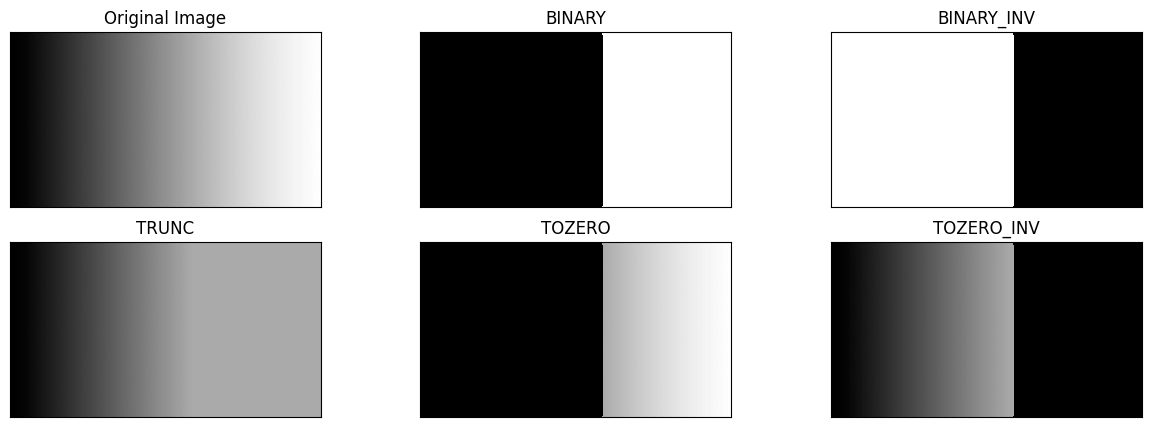

In [16]:
img = cv.imread("/content/drive/MyDrive/PCVK_MM/Images/gradient.jpg")

threshold_value = 170

# Global Threshold
ret,binary = cv.threshold(img,threshold_value,255,cv.THRESH_BINARY)
ret,binary_inv = cv.threshold(img,threshold_value,255,cv.THRESH_BINARY_INV)
ret,trunc = cv.threshold(img,threshold_value,255,cv.THRESH_TRUNC)
ret,tozero = cv.threshold(img,threshold_value,255,cv.THRESH_TOZERO)
ret,tozero_inv = cv.threshold(img,threshold_value,255,cv.THRESH_TOZERO_INV)

# Plotting the results
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary, binary_inv, trunc, tozero, tozero_inv]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

## Otsu Thresholding Manual

In [20]:
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/balloon.jpg', cv.IMREAD_GRAYSCALE)

def calculate_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel in image.ravel():
        histogram[pixel] += 1
    return histogram

In [21]:
def otsu_threshold(image):
    histogram = calculate_histogram(image)
    total_pixels = image.size
    current_max = 0
    threshold = 0
    sum_total, sum_foreground, weight_foreground, weight_background = 0, 0, 0, 0

    for i in range(256):
        sum_total += i * histogram[i]

    for i in range(256):
        weight_background += histogram[i]
        if weight_background == 0:
            continue

        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_foreground += i * histogram[i]
        mean_background = sum_foreground / weight_background
        mean_foreground = (sum_total - sum_foreground) / weight_foreground

        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = i

    return threshold

In [22]:
threshold_otsu = otsu_threshold(image)
print(f"Otsu's Threshold: {threshold_otsu}")

otsu_result = np.where(image >= threshold_otsu, 255, 0).astype(np.uint8)

threshold_value = 90
_, global_threshold = cv.threshold(image, threshold_value, 255, cv.THRESH_BINARY)

Otsu's Threshold: 185


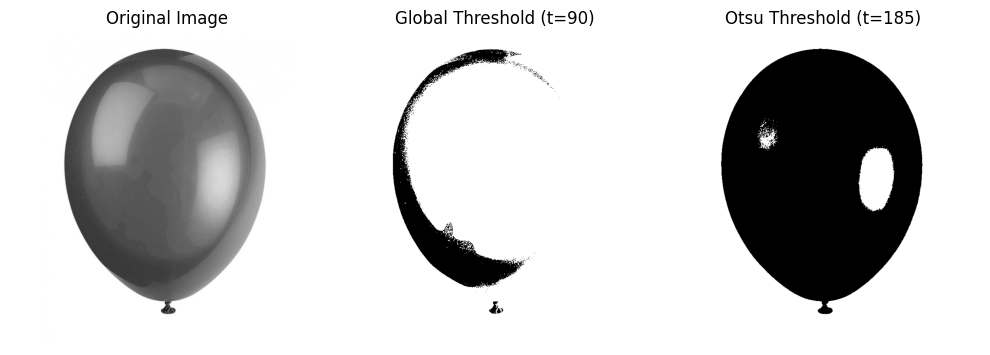

In [23]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_threshold, cmap='gray')
plt.title(f'Global Threshold (t={threshold_value})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu_result, cmap='gray')
plt.title(f'Otsu Threshold (t={threshold_otsu})')
plt.axis('off')

plt.tight_layout()
plt.show()

## Histogram dari Citra Tersegmentasi

In [55]:
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/tobacco.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

def calculate_histogram(image, mask=None):
    hist_r = cv.calcHist([image], [0], mask, [256], [0, 256])
    hist_g = cv.calcHist([image], [1], mask, [256], [0, 256])
    hist_b = cv.calcHist([image], [2], mask, [256], [0, 256])

    hist = {
        'red': hist_r,
        'green': hist_g,
        'blue': hist_b
    }
    return hist


gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
_, mask = cv.threshold(gray, 185, 255, cv.THRESH_BINARY_INV)

segmented_image = cv.bitwise_and(image, image, mask=mask)

hist_og = calculate_histogram(image)

hist_fg = calculate_histogram(image, mask)

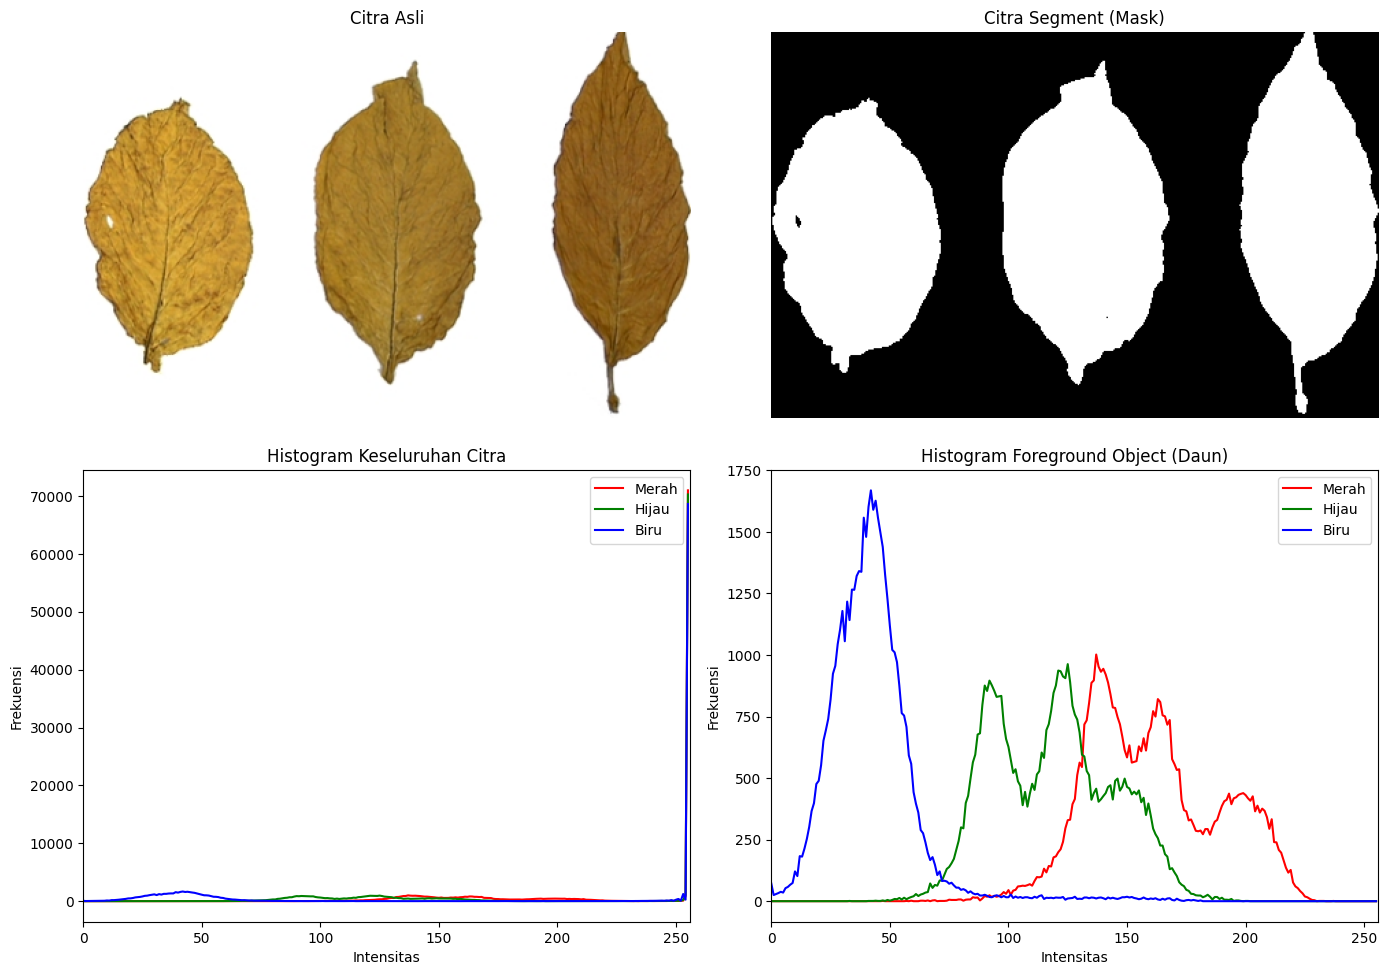

In [56]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment (Mask)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.plot(hist_og['red'], color='red', label='Merah')
plt.plot(hist_og['green'], color='green', label='Hijau')
plt.plot(hist_og['blue'], color='blue', label='Biru')
plt.title('Histogram Keseluruhan Citra')
plt.xlim([0, 256])
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(hist_fg['red'], color='red', label='Merah')
plt.plot(hist_fg['green'], color='green', label='Hijau')
plt.plot(hist_fg['blue'], color='blue', label='Biru')
plt.title('Histogram Foreground Object (Daun)')
plt.xlim([0, 256])
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

## Segmentasi Warna

In [75]:
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/peppers.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

k = 3
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

segmented_image = centers[labels.flatten()].reshape(image.shape).astype(np.uint8)

yellow_cluster = 1
mask = (labels.flatten() == yellow_cluster).astype(np.uint8) * 255

mask = mask.reshape(image.shape[0], image.shape[1])

yellow_segmented_image = cv.bitwise_and(image, image, mask=mask)
yellow_segmented_image[mask == 0] = [255, 255, 255]

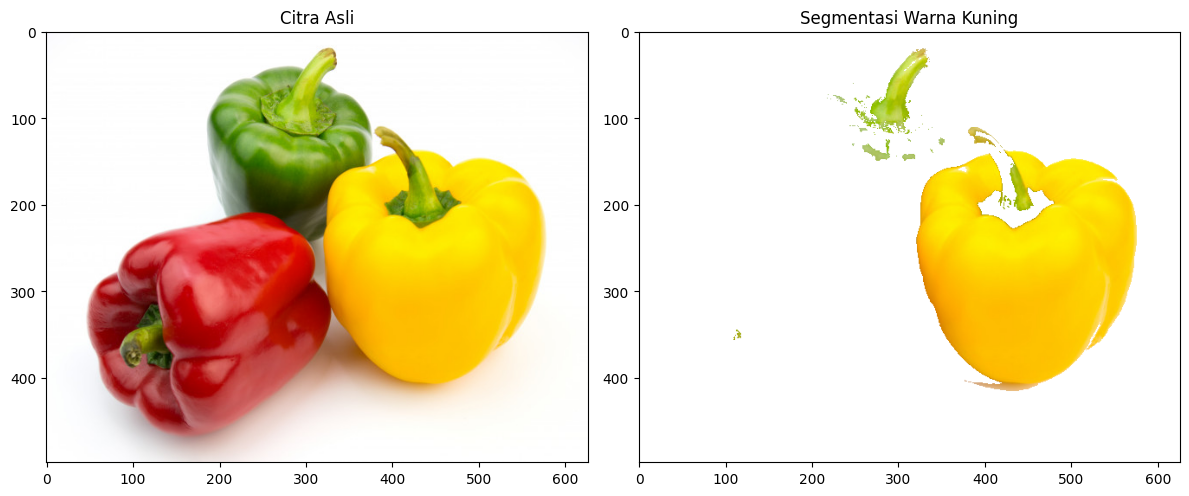

In [76]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(yellow_segmented_image)
plt.title('Segmentasi Warna Kuning')

plt.tight_layout()
plt.show()

Anomali yang terjadi seperti semua warna tidak muncul atau hanya warna kuning yang dihilangkan, terjadi karena hasil dari algoritma K-Means tidak konsisten pada setiap kali dijalankan. Algoritma K-Means bergantung pada inisialisasi acak untuk centroid (pusat cluster), sehingga hasilnya bisa sedikit berbeda setiap kali dijalankan, terutama jika beberapa parameter seperti jumlah iterasi atau kondisi inisialisasi tidak stabil.

# Crossword

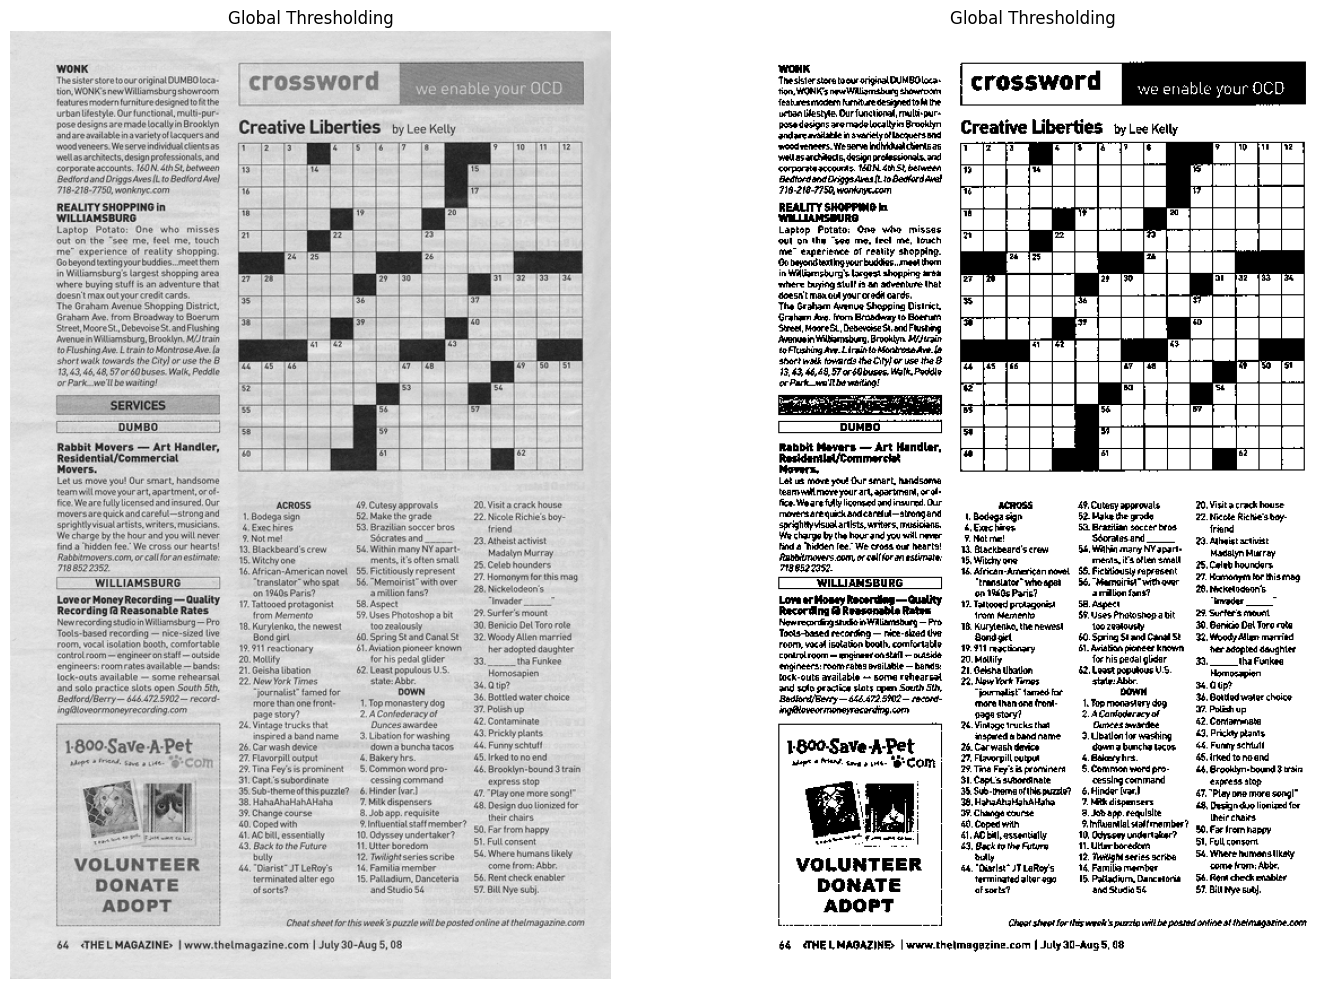

In [92]:
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/crossword.jpg', cv.IMREAD_GRAYSCALE)

_, global_thresh = cv.threshold(image, 175, 255, cv.THRESH_BINARY)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()